In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re


In [88]:
location = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\GEO_LOCATION.csv")

In [89]:
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [90]:
payments = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_PAYMENTS.csv")

In [91]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [92]:
ratings = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")

In [93]:
ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [94]:
orders = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDERS.csv")

In [95]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [96]:
products = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\PRODUCTS.csv")

In [97]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [98]:
sellers = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\SELLERS.csv")

In [99]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [100]:
order_items = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_ITEMS.csv")

In [101]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [102]:
customer = pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\CUSTOMERS.csv")

In [103]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [104]:
orderpayments_value=payments.groupby('order_id').payment_value.sum().reset_index()
order_review_rate_avg=ratings.groupby('order_id').review_score.mean().reset_index()
data=orders.merge(orderpayments_value,on='order_id')
data=data.merge(customer,on='customer_id')
data=data.merge(order_items,how='left',on='order_id')
data=data.merge(products,how='left',on='product_id')
data=data.merge(sellers,how='left',on='seller_id')
data=data.merge(order_review_rate_avg,how='left',on='order_id')
data.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,38.71,7c396fd4830fd04220f754e42b4e5bff,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,Chhuikhadan,Chhattisgarh,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,141.46,af07308b275d755c9edb36a90c618231,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,Anantapur,Andhra Pradesh,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,Freelandgunj,Gujarat,5.0


In [105]:
data=data.drop(columns=['order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date','order_delivered_customer_date','shipping_limit_date','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_height_cm','product_width_cm','seller_city','seller_state','seller_zip_code_prefix'])
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,Housewares,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,141.46,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,Perfumery,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,Auto,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,72.20,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,Pet_Shop,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,Stationery,5.0


In [106]:
data.order_purchase_timestamp=pd.to_datetime(data.order_purchase_timestamp)
data['year']=data.order_purchase_timestamp.dt.year
data['month']=data.order_purchase_timestamp.dt.month_name()
data['week']=data.order_purchase_timestamp.dt.isocalendar().week
data['time']=data.order_purchase_timestamp.dt.time
data['day']=data.order_purchase_timestamp.dt.date
data['month_year']=data.order_purchase_timestamp.dt.date.astype(str).str[0:7]
data['price_to_pay']=data['price']+data['freight_value']
data.duplicated(['order_id','product_id','order_item_id']).sum()


0

In [107]:
data.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,...,freight_value,product_category_name,review_score,year,month,week,time,day,month_year,price_to_pay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.0,...,8.72,Housewares,4.0,2017,October,40,10:56:00,2017-10-02,2017-10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,141.46,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.0,...,22.76,Perfumery,4.0,2018,July,30,20:41:00,2018-07-24,2018-07,141.46


# 1. Perform Detailed exploratory analysis

# a. Define & calculate high level metrics like (Total Revenue, Total quantity, Totalproducts, Total categories, Total sellers, Total locations, Total channels, Totalpayment methods etc…) 

In [108]:
#1TOTAL REVENUE : UNITS SOLD * PRICE OF PRODUCT

In [109]:
order_items['price_to_pay']=order_items['price']+order_items['freight_value']
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_to_pay
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.0,17.87,216.87


In [110]:
order_items.price_to_pay.sum()

15843553.24

In [111]:
#TOTAL QUANTITY

In [112]:
order_items.order_id.count()

112650

In [113]:
#TOTAL PRODUCTS

In [114]:
order_items.product_id.nunique()

32951

In [115]:
#TOTAL CATEGORIES

In [116]:
products.product_category_name.nunique()

71

In [117]:
#TOTAL SELLERS

In [118]:
sellers.seller_id.count()

3095

In [119]:
#TOTAL GEO LOCATION

In [120]:
location.geolocation_zip_code_prefix.count()

19015

In [121]:
#TOTAL PAYMENT METHOD

In [122]:
payments.payment_type.value_counts()

payment_type
credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [123]:
len(payments.payment_type.value_counts())

5

# b. Understanding how many new customers acquired every month


In [124]:
# sort data by customer level
b=data.groupby(['order_id','customer_id']).last().reset_index()
customer_count_per_month=b.groupby(['month_year',b.customer_id.rename('customer')]).customer_id.count().reset_index()
customer_firstpurchase=b.groupby('customer_id').month_year.min().reset_index().rename(columns={'customer_id':'customer','month_year':'first_purchase_month'})
bfinal=customer_count_per_month.merge(customer_firstpurchase,on='customer')
bfinal.customer_id=np.where(bfinal.month_year==bfinal.first_purchase_month,'New','Old')
bfinal.head()

,month_year,customer,customer_id,first_purchase_month
0,2016-09,08c5351a6aca1c1589a38f244edeee9d,New,2016-09
1,2016-09,622e13439d6b5a0b486c435618b2679e,New,2016-09
2,2016-09,683c54fc24d40ee9f8a6fc179fd9856c,New,2016-09
3,2016-10,00474d2582fd72663036795b7ab8cfc1,New,2016-10
4,2016-10,01415cfeb907d8ce0e17075b4c097fe9,New,2016-10


In [125]:
bfinal.query('customer_id=="New"').groupby('month_year').customer_id.count()

month_year
2016-09       3
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Name: customer_id, dtype: int64

# c. Understand the retention of customers on month on month basis

In [126]:
bfinal.customer_id.value_counts()

customer_id
New    99440
Name: count, dtype: int64

In [127]:
data.customer_id.nunique()

99440

In [128]:
data.order_id.nunique()

99440

# d. How the revenues from existing/new customers on month on month basis

In [129]:
d = data.drop_duplicates('customer_id')

In [130]:
D=d.groupby('month_year').payment_value.sum().reset_index()


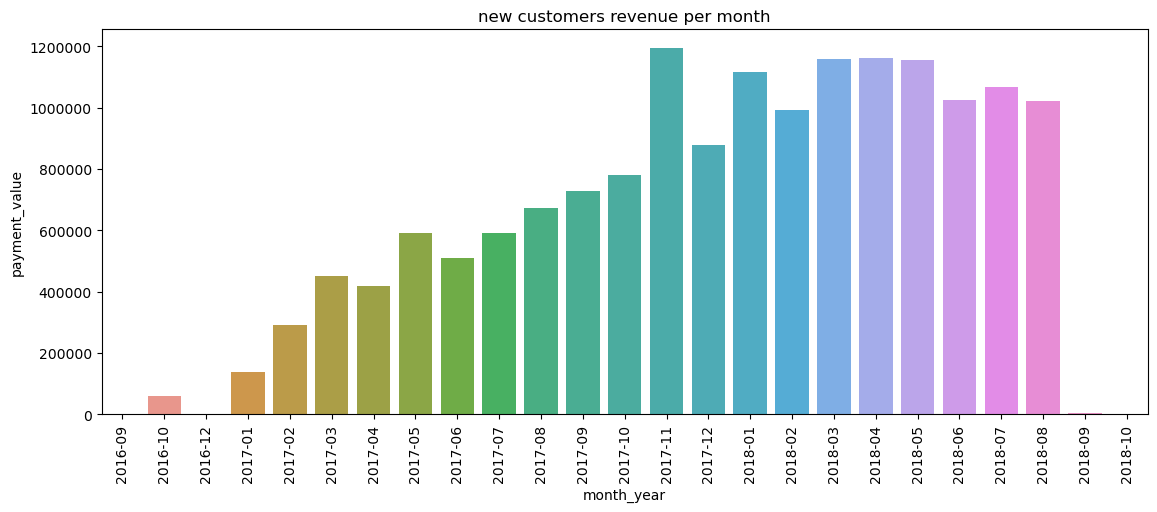

In [132]:
plt.figure(figsize=(13.5,5))
sns.barplot(x=D.month_year,y=D.payment_value,data= D)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain',axis='y')
plt.title('new customers revenue per month')
plt.show()

# e. Understand the trends/seasonality of sales, quantity by category, location, month,week, day, time, channel, payment method etc…

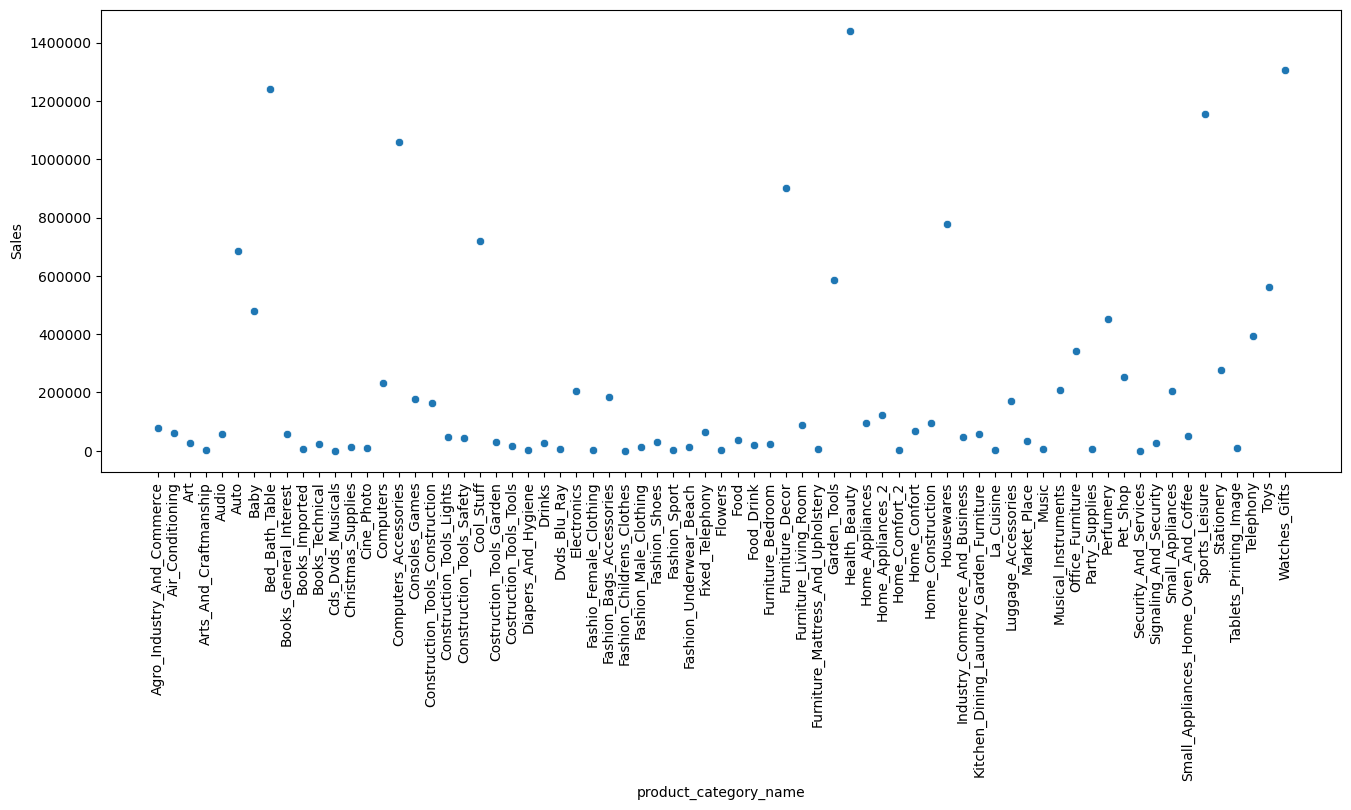

In [133]:
e1=data.groupby('product_category_name').price_to_pay.sum().reset_index()
plt.figure(figsize=(16,6))
sns.scatterplot(x='product_category_name',y='price_to_pay',data=e1)
plt.ylabel('Sales')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.show()

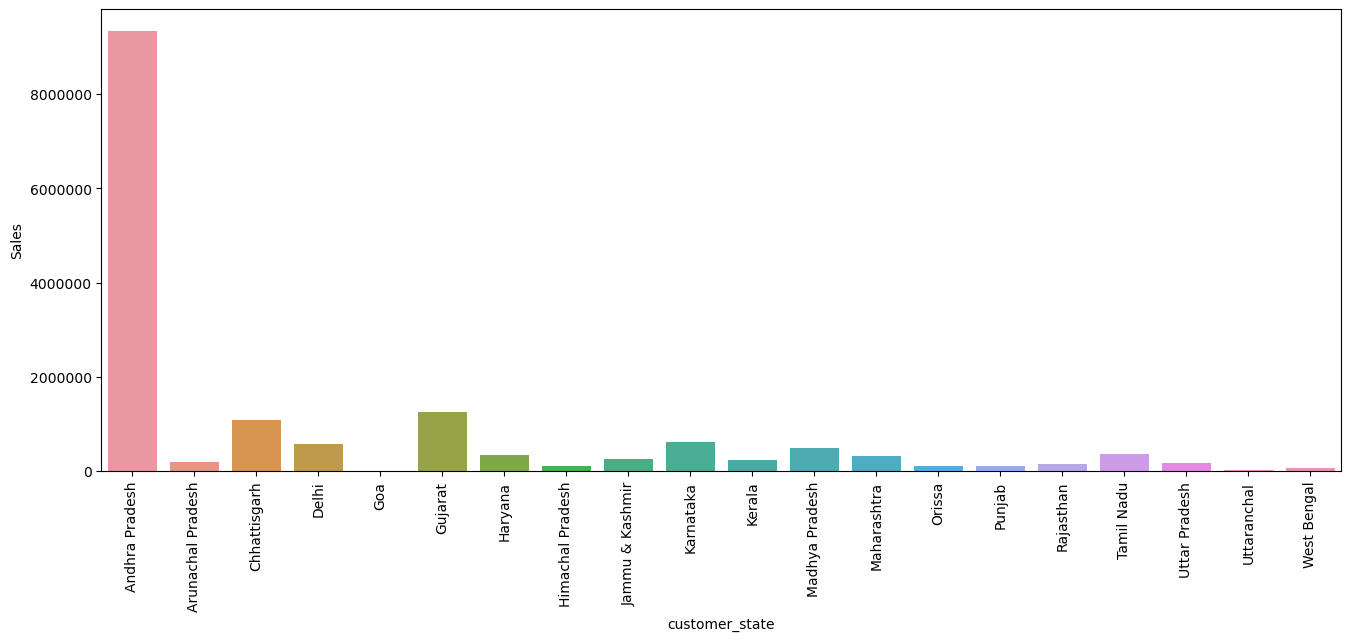

In [134]:
e3=data.groupby('customer_state').price_to_pay.sum().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x=e3.customer_state,y=e3.price_to_pay)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

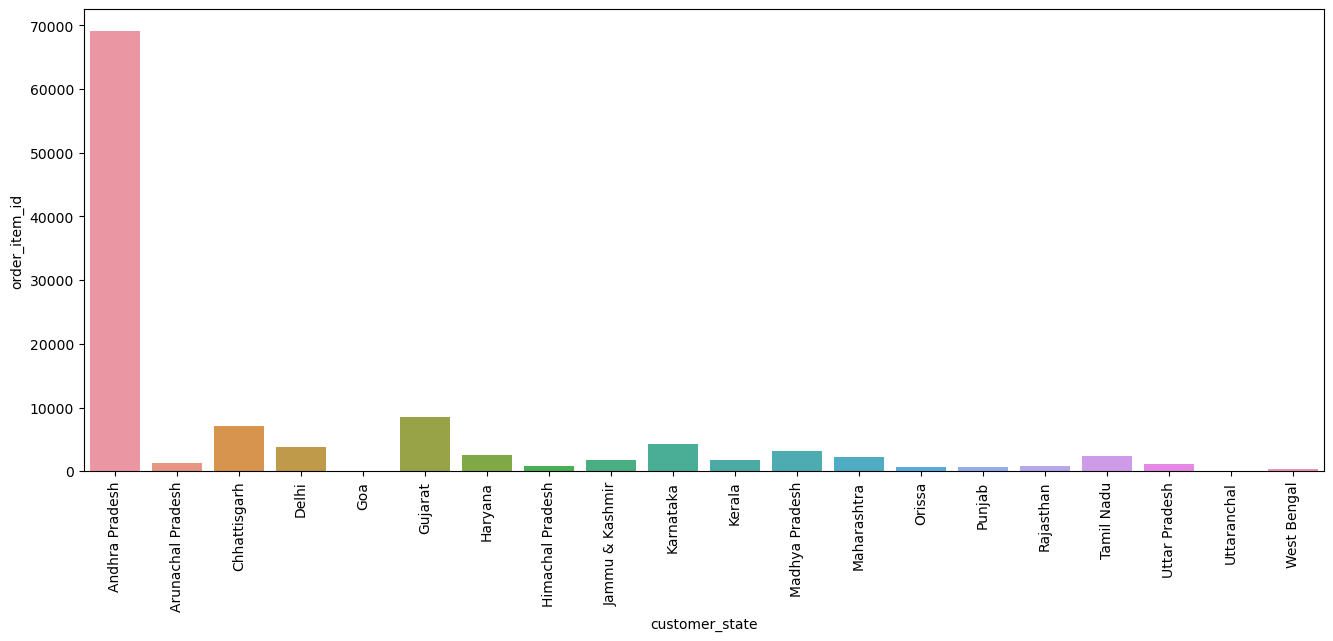

In [135]:
e4=data.groupby('customer_state').order_item_id.count().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x=e4.customer_state,y=e4.order_item_id)
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.show()

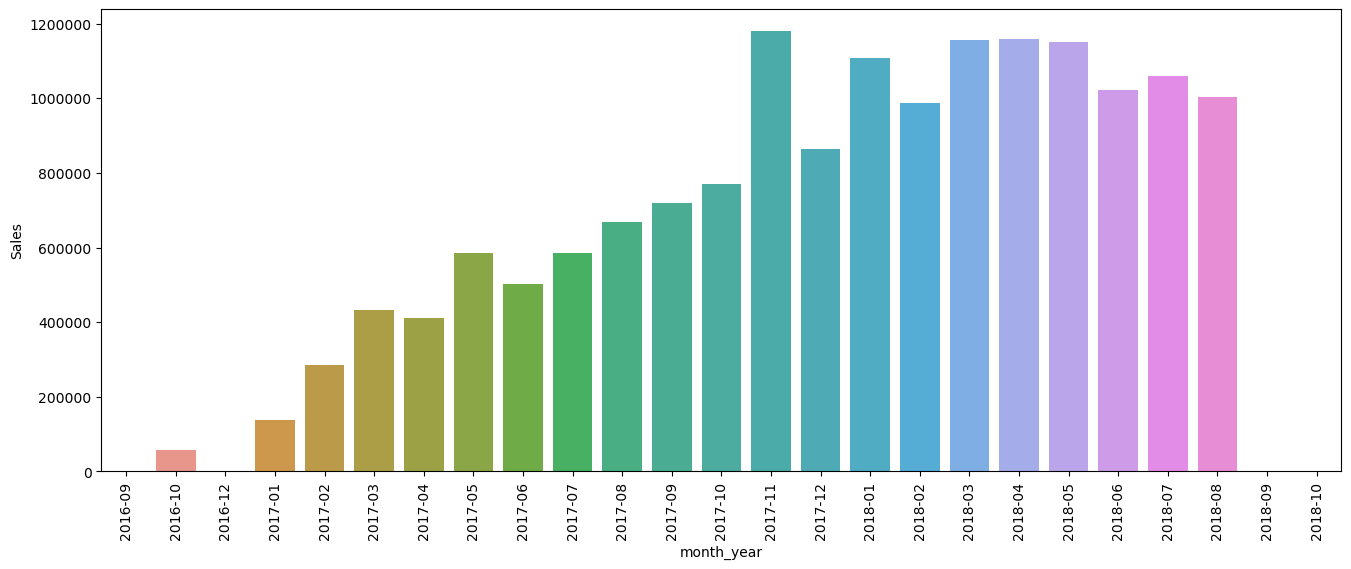

In [136]:
e5=data.groupby('month_year').price_to_pay.sum().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x=e5.month_year,y=e5.price_to_pay)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

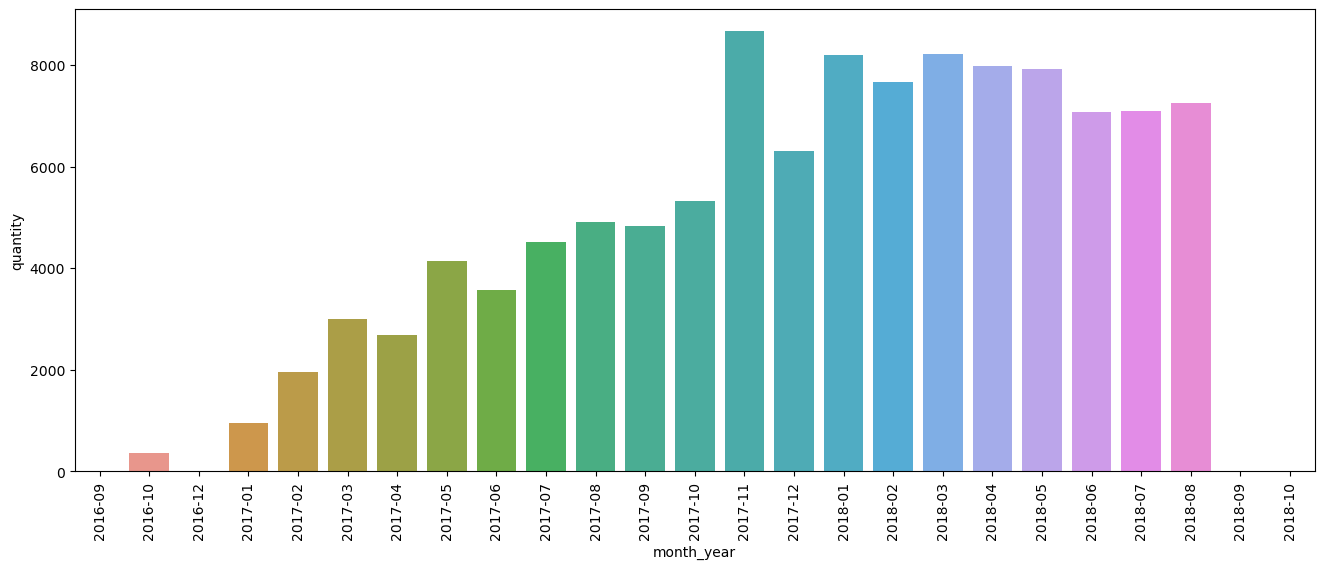

In [137]:
e6=data.groupby('month_year').order_item_id.count().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x=e6.month_year,y=e6.order_item_id)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('quantity')
plt.xticks(rotation=90)
plt.show()

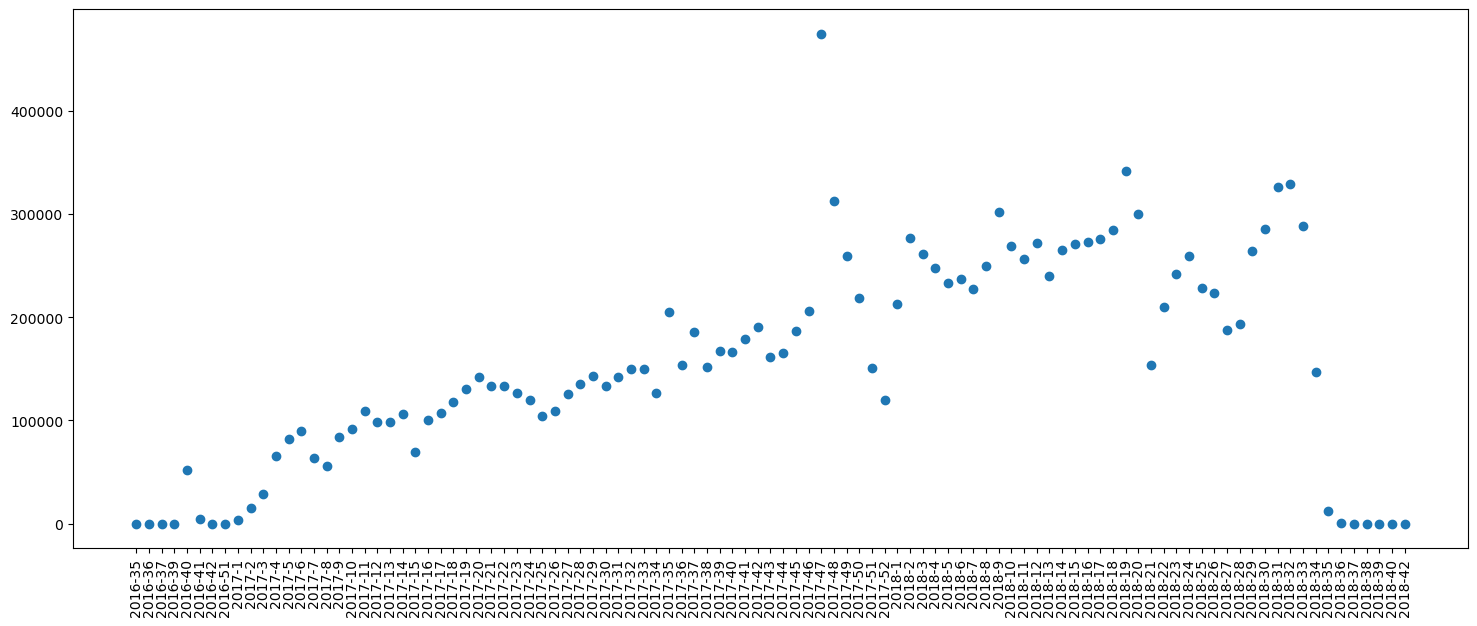

In [138]:
e7=data.groupby(['year','week']).price_to_pay.sum().reset_index()
e7['year_week']=e7.year.astype(str)+'-'+e7.week.astype(str)
plt.figure(figsize=(18,7))
plt.scatter(x=e7.year_week,y=e7.price_to_pay)
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.show()

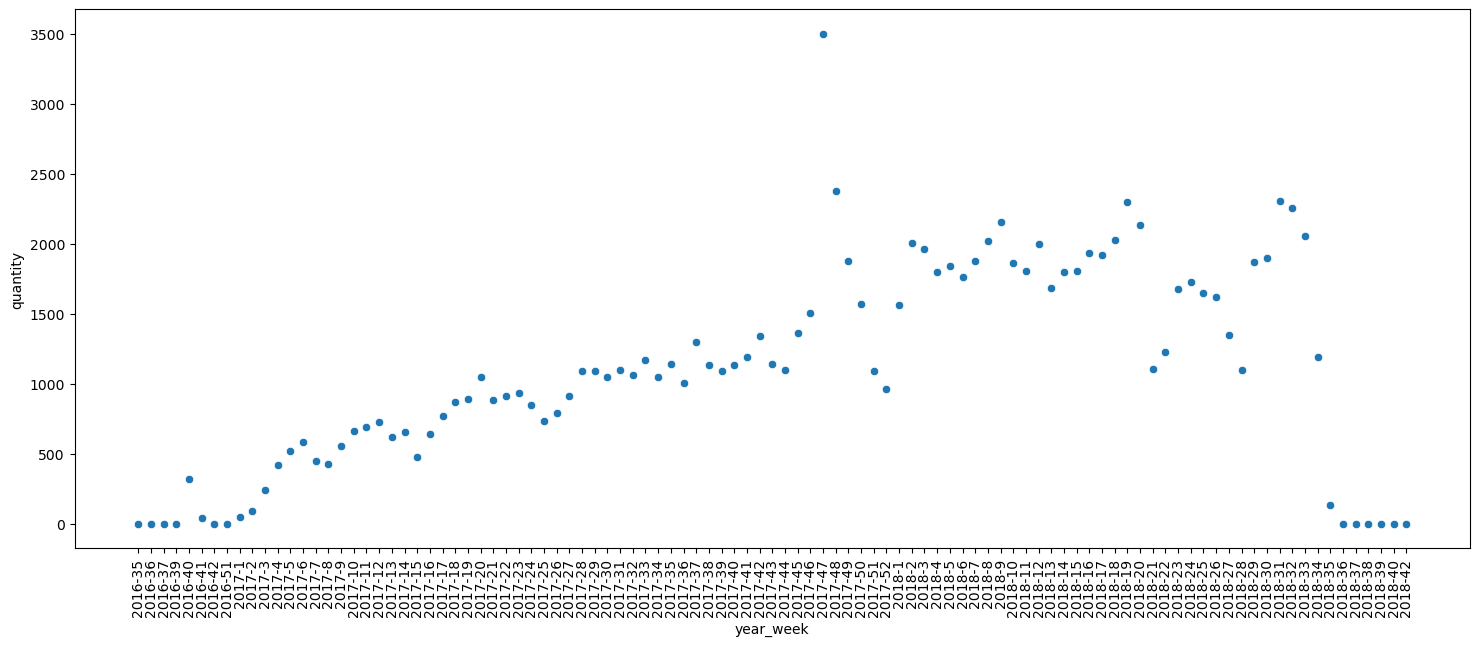

In [139]:
e8=data.groupby(['year','week']).order_item_id.count().reset_index()
e8['year_week']=e8.year.astype(str)+'-'+e8.week.astype(str)
plt.figure(figsize=(18,7))
sns.scatterplot(x=e8.year_week,y=e8.order_item_id)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('quantity')
plt.xticks(rotation=90)
plt.show()

In [140]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,...,freight_value,product_category_name,review_score,year,month,week,time,day,month_year,price_to_pay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.0,...,8.72,Housewares,4.0,2017,October,40,10:56:00,2017-10-02,2017-10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,141.46,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.0,...,22.76,Perfumery,4.0,2018,July,30,20:41:00,2018-07-24,2018-07,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1.0,...,19.22,Auto,5.0,2018,August,32,08:38:00,2018-08-08,2018-08,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,72.20,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,1.0,...,27.20,Pet_Shop,5.0,2017,November,46,19:28:00,2017-11-18,2017-11,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,1.0,...,8.72,Stationery,5.0,2018,February,7,21:18:00,2018-02-13,2018-02,28.62


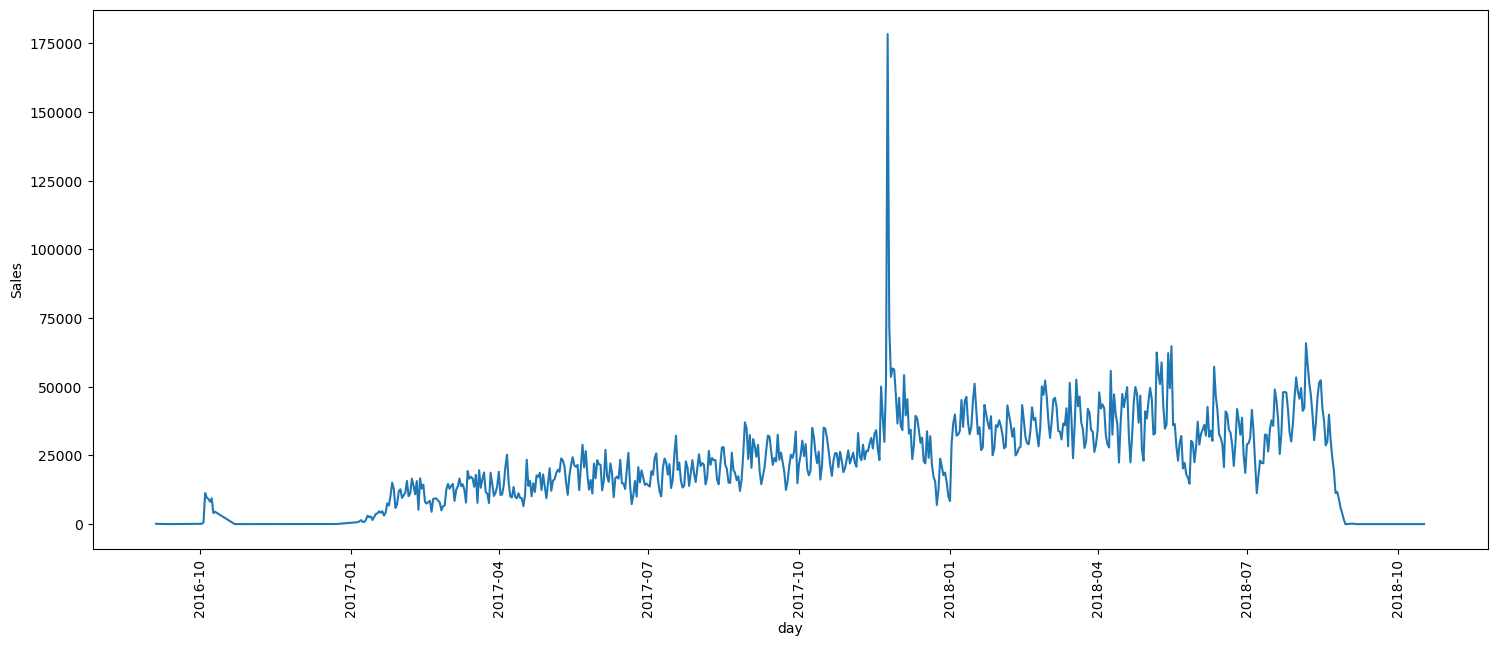

In [141]:
e9=data.groupby('day').price_to_pay.sum().reset_index()
plt.figure(figsize=(18,7))
sns.lineplot(x='day',y='price_to_pay',data=e9)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

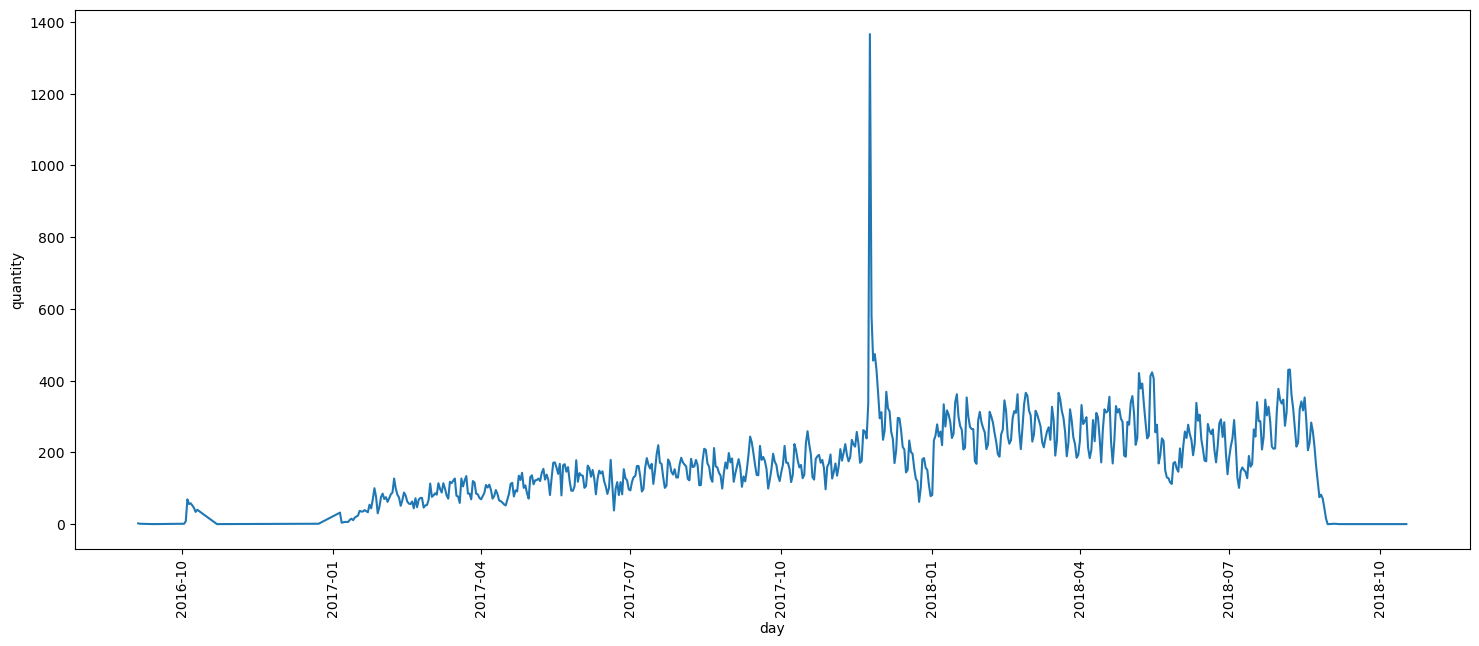

In [142]:


e10=data.groupby('day').order_item_id.count().reset_index()
plt.figure(figsize=(18,7))
sns.lineplot(x='day',y='order_item_id',data=e10)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('quantity')
plt.xticks(rotation=90)
plt.show()

In [143]:
payments.payment_type.nunique()

5

In [144]:
payments.groupby('payment_type').payment_value.sum()

payment_type
UPI             2869361.27
credit_card    12542084.19
debit_card       217989.79
not_defined           0.00
voucher          379436.87
Name: payment_value, dtype: float64

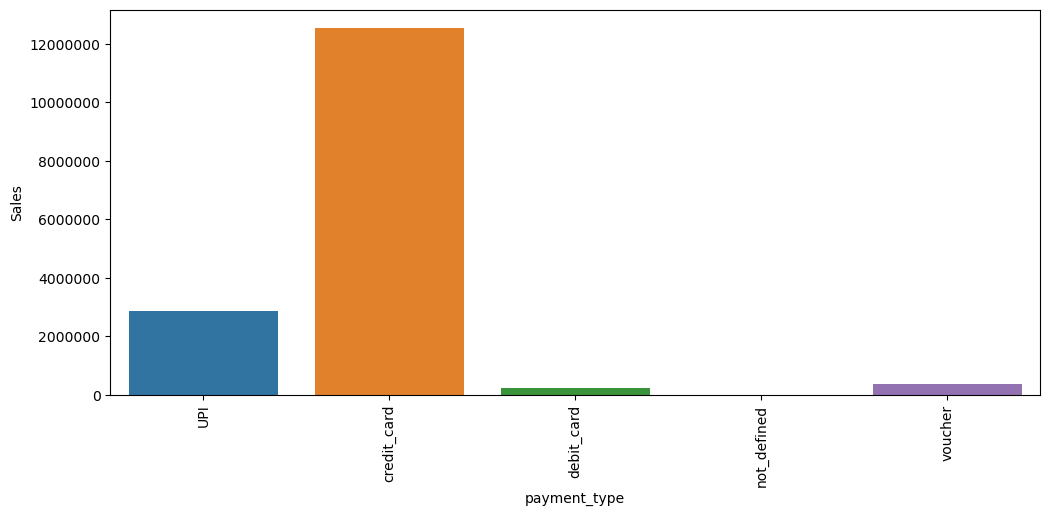

In [145]:
e11=payments.groupby('payment_type').payment_value.sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x=e11.payment_type,y=e11.payment_value)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# f. Popular Products by month, seller, state, category.

In [146]:
f1=data.groupby(['month_year',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['month_year','product_id'],ascending=[True,False])
f1=f1.groupby('month_year').head(5).reset_index(drop=True)
f1[['month_year','product']]

,month_year,product
0,2016-09,c1488892604e4ba5cff5b4eb4d595400
1,2016-09,f293394c72c9b5fafd7023301fc21fc2
2,2016-09,f3c2d01a84c947b078e32bbef0718962
3,2016-10,eba7488e1c67729f045ab43fac426f2e
4,2016-10,d9894482fba41f536a273ba2276d951f
...,...,...
105,2018-08,73326828aa5efe1ba096223de496f596
106,2018-08,19c91ef95d509ea33eda93495c4d3481
107,2018-08,3fbc0ef745950c7932d5f2a446189725
108,2018-08,a92930c327948861c015c919a0bcb4a8


In [147]:
f2=data.groupby(['seller_id',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['seller_id','product_id'],ascending=[True,False])
f2=f2.groupby('seller_id').head(5).reset_index(drop=True)
f2[['seller_id','product']]

,seller_id,product
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e
2,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580
3,001cca7ae9ae17fb1caed9dfb1094831,98a8c2fa16d7239c606640f5555768e4
4,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39
...,...,...
10367,ffff564a4f9085cd26170f4732393726,8f7a3322e1abfed89ac080b0f7364779
10368,ffff564a4f9085cd26170f4732393726,96aca2f53bcaed6f466449f7fb18ae75
10369,ffff564a4f9085cd26170f4732393726,c4b925e40f11289063a854c47aaef129
10370,ffff564a4f9085cd26170f4732393726,c5897f6f2d995196dbb40542439da9b9


In [148]:
f3=data.groupby(['customer_state',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['customer_state','product_id'],ascending=[True,False])
f3=f3.groupby('customer_state').head(5).reset_index(drop=True)
f3[['customer_state','product']]

,customer_state,product
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af
1,Andhra Pradesh,99a4788cb24856965c36a24e339b6058
2,Andhra Pradesh,422879e10f46682990de24d770e7f83d
3,Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08
4,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b
...,...,...
95,West Bengal,99a4788cb24856965c36a24e339b6058
96,West Bengal,30ac6df06dc59ad72cf2f158fc2d904c
97,West Bengal,389d119b48cf3043d311335e499d9c6b
98,West Bengal,ffaf0af7eebb57c7f262b51ebb05dfd6


In [149]:
f4=data.groupby(['product_category_name',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['product_category_name','product_id'],ascending=[True,False])
f4=f4.groupby('product_category_name').head(5).reset_index(drop=True)
f4[['product_category_name','product']]

,product_category_name,product
0,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed
1,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690
2,Agro_Industry_And_Commerce,672e757f331900b9deea127a2a7b79fd
3,Agro_Industry_And_Commerce,3bebad3cf2c8d1a8d3ce97174643e054
4,Agro_Industry_And_Commerce,a0fe1efb855f3e786f0650268cd77f44
...,...,...
343,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08
344,Watches_Gifts,a62e25e09e05e6faf31d90c6ec1aa3d1
345,Watches_Gifts,e0d64dcfaa3b6db5c54ca298ae101d05
346,Watches_Gifts,a92930c327948861c015c919a0bcb4a8


# g. Popular categories by state, month


In [150]:
g1=data.groupby(['customer_state',data.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['customer_state','product_category_name'],ascending=[True,False])
g1=g1.groupby('customer_state').head(5).reset_index(drop=True)
g1[['customer_state','category']]

,customer_state,category
0,Andhra Pradesh,Bed_Bath_Table
1,Andhra Pradesh,Health_Beauty
2,Andhra Pradesh,Sports_Leisure
3,Andhra Pradesh,Furniture_Decor
4,Andhra Pradesh,Computers_Accessories
...,...,...
95,West Bengal,Health_Beauty
96,West Bengal,Telephony
97,West Bengal,Computers_Accessories
98,West Bengal,Bed_Bath_Table


In [151]:
g1=data.groupby(['month_year',data.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['month_year','product_category_name'],ascending=[True,False])
g1=g1.groupby('month_year').head(5).reset_index(drop=True)
g1[['month_year','category']]

,month_year,category
0,2016-09,Furniture_Decor
1,2016-09,Telephony
2,2016-10,Furniture_Decor
3,2016-10,Health_Beauty
4,2016-10,Perfumery
...,...,...
104,2018-08,Bed_Bath_Table
105,2018-08,Housewares
106,2018-08,Sports_Leisure
107,2018-08,Furniture_Decor


# h. List top 10 most expensive products sorted by price

In [152]:
expensive = data.groupby(['product_id'])['price'].mean()
expensive.sort_values(ascending = False).head(10).reset_index().product_id

0    489ae2aa008f021502940f251d4cce7f
1    69c590f7ffc7bf8db97190b6cb6ed62e
2    1bdf5e6731585cf01aa8169c7028d6ad
3    a6492cc69376c469ab6f61d8f44de961
4    c3ed642d592594bb648ff4a04cee2747
5    259037a6a41845e455183f89c5035f18
6    a1beef8f3992dbd4cd8726796aa69c53
7    6cdf8fc1d741c76586d8b6b15e9eef30
8    6902c1962dd19d540807d0ab8fade5c6
9    4ca7b91a31637bd24fb8e559d5e015e4
Name: product_id, dtype: object

# 2. Performing Customers/sellers Segmentation


# a. Divide the customers into groups based on the revenue generated 

In [153]:
a2=data.groupby('customer_id').price_to_pay.sum().reset_index()
a2['Group_number']=pd.qcut(a2['price_to_pay'],10,labels=False)
a2[['customer_id','Group_number']]

,customer_id,Group_number
0,00012a2ce6f8dcda20d059ce98491703,5
1,000161a058600d5901f007fab4c27140,2
2,0001fd6190edaaf884bcaf3d49edf079,7
3,0002414f95344307404f0ace7a26f1d5,7
4,000379cdec625522490c315e70c7a9fb,5
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,3
99436,fffeda5b6d849fbd39689bb92087f431,2
99437,ffff42319e9b2d713724ae527742af25,8
99438,ffffa3172527f765de70084a7e53aae8,1


# b. Divide the sellers into groups based on the revenue generated

In [154]:
b2=data.groupby('seller_id').price_to_pay.sum().reset_index()
b2['Group_number']=pd.qcut(b2['price_to_pay'],10,labels=False)
b2[['seller_id','Group_number']]

,seller_id,Group_number
0,0015a82c2db000af6aaaf3ae2ecb0532,6
1,001cca7ae9ae17fb1caed9dfb1094831,9
2,001e6ad469a905060d959994f1b41e4f,2
3,002100f778ceb8431b7a1020ff7ab48f,6
4,003554e2dce176b5555353e4f3555ac8,1
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,0
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,6
3092,ffeee66ac5d5a62fe688b9d26f83f534,6
3093,fffd5413c0700ac820c7069d66d98c89,9


In [155]:
data.product_id.nunique()

32951

# 3. Cross-Selling (Which products are selling together)
#Hint: We need to find which of the top 10 combinations of products are selling together ineach transaction. (combination of 2 or 3 buying together)

In [159]:
cs=data.groupby(['order_id','product_id']).order_item_id.count().reset_index()
cs=pd.crosstab(data.order_id,data.product_category_name)
function=lambda x: True if x>0 else False
for i in cs.columns:
    cs[i]=cs[i].apply(function)
cs.head()

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00018f77f2f0320c557190d7a144bdd3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
000229ec398224ef6ca0657da4fc703e,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00024acbcdf0a6daa1e931b038114c75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00042b26cf59d7ce69dfabb4e55b4fd9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 4. Payment Behaviour

# a. How customers are paying?

In [160]:
payments.payment_type.value_counts()

payment_type
credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

# b. Which payment channels are used by most customers?

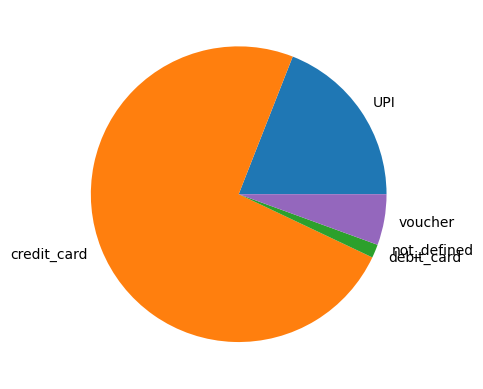

In [161]:
payment_behaviour=payments.merge(orders,on='order_id')
a4=payment_behaviour.groupby('payment_type').customer_id.count().reset_index()
plt.pie(a4.customer_id,labels=a4.payment_type)
plt.show()

<Axes: xlabel='payment_type'>

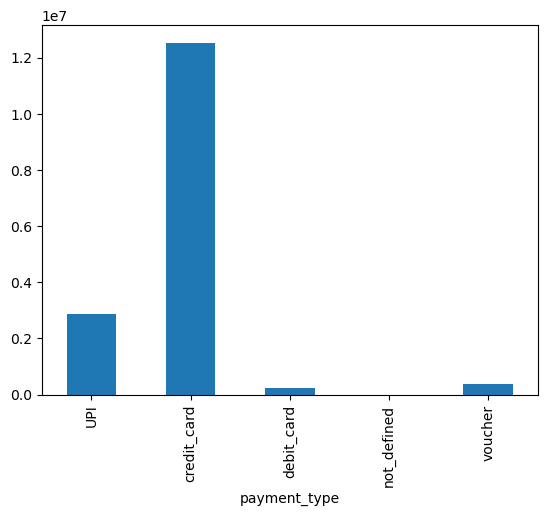

In [162]:
payment_behaviour.groupby('payment_type').payment_value.sum().plot.bar()

# 5. Customer satisfaction towards category & product

# a. Which categories (top 10) are maximum rated & minimum rated?

In [163]:
category_ratings=data.groupby('product_category_name').review_score.mean().reset_index().sort_values(by='review_score')
#  top 10 min rated
category_ratings.head(10)

,product_category_name,review_score
61,Security_And_Services,2.500000
23,Diapers_And_Hygiene,3.256410
46,Home_Comfort_2,3.366667
57,Office_Furniture,3.480189
30,Fashion_Male_Clothing,3.621212
34,Fixed_Telephony,3.670455
58,Party_Supplies,3.767442
27,Fashio_Female_Clothing,3.781250
52,La_Cuisine,3.785714
4,Audio,3.814560


In [164]:
#  top 10 max rated
category_ratings.tail(10)

,product_category_name,review_score
32,Fashion_Sport,4.233333
37,Food_Drink,4.300360
64,Small_Appliances_Home_Oven_And_Coffee,4.302632
53,Luggage_Accessories,4.309524
10,Books_Technical,4.333333
22,Costruction_Tools_Tools,4.359223
9,Books_Imported,4.400000
8,Books_General_Interest,4.439421
29,Fashion_Childrens_Clothes,4.500000
11,Cds_Dvds_Musicals,4.642857


# b. Which products (top10) are maximum rated & minimum rated?

In [165]:
product_ratings=data.groupby('product_id').review_score.mean().reset_index().sort_values(by='review_score')
#  top 10 min rated
product_ratings.head(10)

,product_id,review_score
11572,592cc6634d2c783d297effc0b828bc37,1.0
9385,482c25dc8512547962854dfff5ac057b,1.0
28997,e10c5041c0752194622a7a7016d8c9b5,1.0
9364,47fafa6908e75ae62b8a36a9eb3b9234,1.0
9346,47d85e3e35a3e29f93fdc12b295d520c,1.0
9344,47d6209a0b169cc800b0a45a9127d2f2,1.0
9337,47cad419b0ad5dc9d2305bf795c3c16f,1.0
9325,47b49b876c60eafde72f0e1c602f386d,1.0
9324,47b0f8596ee6dafbb4438cac16fa6275,1.0
9321,47ac4dcdb04867daeaad647d224389e4,1.0


In [166]:
#  top 10 max rated
product_ratings.tail(10)

,product_id,review_score
15307,760be8243b7e45dab18ef46ace561ff9,5.0
15303,76052d3aafb407055d02120f56cc8a26,5.0
15302,76047a9f85e0601a31579a9a9e88a0e8,5.0
15301,7600ad0c8b6aec897862eb7944ae0856,5.0
15300,75fd4b482095ed05dd23030260e65300,5.0
15299,75fc57fb06b1d35ea433e16ecbf5a6bb,5.0
15298,75f95431890ea981914bdb4772341221,5.0
15296,75f54c6aa3a4ccb9ab44fae693c21418,5.0
15305,76061aaf8a1e4e93cdd26f7bef9ce247,5.0
16475,7f6f8bdeee8ab42b5b4873b754f22a15,5.0


# c. Average rating by location, seller, product, category, month etc.

In [167]:
# data at customer level
c1=data.groupby(['order_id','customer_id']).last().reset_index()
c1.groupby('customer_state').review_score.mean().reset_index()

,customer_state,review_score
0,Andhra Pradesh,4.052502
1,Arunachal Pradesh,4.112601
2,Chhattisgarh,4.088828
3,Delhi,4.061074
4,Goa,4.800000
5,Gujarat,4.084371
6,Haryana,4.145550
7,Himachal Pradesh,4.023553
8,Jammu & Kashmir,4.084906
9,Karnataka,4.073849


In [168]:
# getting data at product and seller level:
c2=data.groupby(['order_id','product_id','seller_id']).last().reset_index()
c2.groupby('seller_id').review_score.mean().reset_index()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.935323
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.981818
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.333333
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.866667


In [169]:
# getting data at product  level:
c3=data.groupby(['order_id','product_id']).last().reset_index()
c3.groupby('product_id').review_score.mean().reset_index()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.5
32947,fff81cc3158d2725c0655ab9ba0f712c,4.0
32948,fff9553ac224cec9d15d49f5a263411f,5.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [170]:
# getting data at product  level:
c4=data.groupby(['order_id','product_id']).last().reset_index()
c4.groupby('product_category_name').review_score.mean().reset_index()

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.027322
1,Air_Conditioning,3.984252
2,Art,4.004950
3,Arts_And_Craftmanship,4.125000
4,Audio,3.818571
...,...,...
66,Stationery,4.218606
67,Tablets_Printing_Image,4.075949
68,Telephony,3.971075
69,Toys,4.160719


In [171]:
# getting data at product  level:
c5=data.groupby(['order_id','product_id']).last().reset_index()
c5.groupby('month_year').review_score.mean().reset_index()

,month_year,review_score
0,2016-09,1.000000
1,2016-10,3.600917
2,2016-12,5.000000
3,2017-01,4.061286
4,2017-02,4.054657
5,2017-03,4.082937
6,2017-04,4.033658
7,2017-05,4.139364
8,2017-06,4.128078
9,2017-07,4.164812
